In [20]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from models.ddm import DDM
from plots import redm
from metrics import inversion_number

In [23]:
score_0 = np.loadtxt("outputs/kdd_scores_val_ae_model_kdd_0.csv", delimiter=",")
score_1 = np.loadtxt("outputs/kdd_scores_val_ae_model_kdd_1.csv", delimiter=",")
score_2 = np.loadtxt("outputs/kdd_scores_val_ae_model_kdd_2.csv", delimiter=",")
score_3 = np.loadtxt("outputs/kdd_scores_val_ae_model_kdd_3.csv", delimiter=",")
score_4 = np.loadtxt("outputs/kdd_scores_val_ae_model_kdd_4.csv", delimiter=",")

In [24]:
scores_kdd = np.concatenate((score_0.reshape(-1, 1), score_1.reshape(-1, 1), score_2.reshape(-1, 1),
                            score_3.reshape(-1, 1), score_4.reshape(-1, 1)), axis=1)

In [25]:
scores_kdd.shape

(19687, 5)

In [26]:
eta_0 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_0.csv")
eta_1 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_1.csv")
eta_2 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_2.csv")
eta_3 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_3.csv")
eta_4 = np.loadtxt("outputs/kdd_threshold_ae_model_kdd_4.csv")

In [27]:
XY_val = np.loadtxt("data/kdd_val.csv", delimiter=',')

In [28]:
y_val = XY_val[:, -1]

In [29]:
y_pred_0 = (score_0 > eta_0).astype(int)
y_pred_1 = (score_1 > eta_1).astype(int)
y_pred_2 = (score_2 > eta_2).astype(int)
y_pred_3 = (score_3 > eta_3).astype(int)
y_pred_4 = (score_4 > eta_4).astype(int)

In [30]:
print(classification_report(y_val, y_pred_0))
print(classification_report(y_val, y_pred_1))
print(classification_report(y_val, y_pred_2))
print(classification_report(y_val, y_pred_3))
print(classification_report(y_val, y_pred_4))

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61      5380
         1.0       0.86      0.85      0.85     14307

    accuracy                           0.79     19687
   macro avg       0.73      0.74      0.73     19687
weighted avg       0.79      0.79      0.79     19687

              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59      5380
         1.0       0.84      0.85      0.85     14307

    accuracy                           0.78     19687
   macro avg       0.72      0.72      0.72     19687
weighted avg       0.78      0.78      0.78     19687

              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57      5380
         1.0       0.83      0.88      0.85     14307

    accuracy                           0.78     19687
   macro avg       0.72      0.70      0.71     19687
weighted avg       0.77      0.78      0.77     19687

              preci

In [31]:
eta = (eta_0 + eta_1 + eta_2 + eta_3 + eta_4)/5

In [32]:
mean_scores_kdd = np.mean(scores_kdd, axis=1)
std_scores_kdd = np.std(scores_kdd, axis=1)

In [33]:
index_n = mean_scores_kdd < eta
index_a = mean_scores_kdd >= eta
normal_scores_kdd = mean_scores_kdd[index_n]

In [34]:
ddm = DDM(scores_kdd, eta, d=0.6, phi=0.4)

In [35]:
(E_normal, S_normal, S_n, y_normal), (E_abnormal, S_abnormal, S_a, y_abnormal) = ddm.distribution_segments()

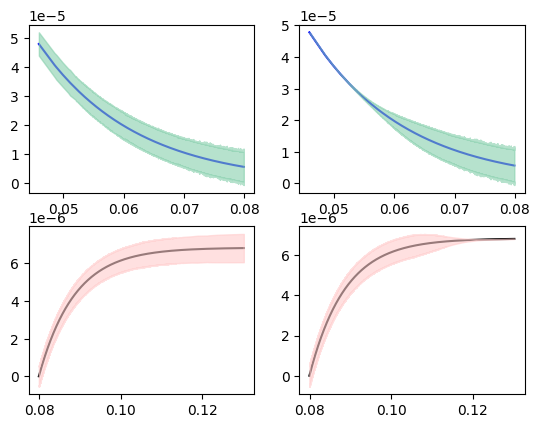

In [36]:
redm((E_normal, S_normal, S_n, y_normal), (E_abnormal, S_abnormal, S_a, y_abnormal), "test_kdd")

In [37]:
inversion_number(E_normal, S_normal, E_abnormal, S_abnormal, eta)

(0.14539121777255487, 0.881090543871885, 0.51324088082222)

In [38]:
inversion_number(E_normal, S_n, E_abnormal, S_a, eta)

(0.09808862203125988, 0.7321334252208856, 0.4151110236260728)